<a href="https://colab.research.google.com/github/Ovalclone/Paradigmas-Programacion-2/blob/main/Visualizando_el_limite_de_decisi%C3%B3n_del_Perceptr%C3%B3n_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Dataset***
El conjunto de datos flor Iris o conjunto de datos iris de Fisher es un conjunto de datos multivariante introducido por Ronald Fisher en su artículo de 1936, The use of multiple measurements in taxonomic problems (El uso de medidas múltiples en problemas taxonómicos) como un ejemplo de análisis discriminante lineal. A veces, se llama Iris conjunto de datos de Anderson porque Edgar Anderson coleccionó los datos para cuantificar la variación morfológica de la flor Iris de tres especies relacionadas. Dos de las tres especies se coleccionaron en la Península de la Gaspesia «todos son de la misma pastura, y recolectado el mismo día y medidos al mismo tiempo por la misma persona con el mismo aparato». El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

# ***`Enunciado`***


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
# Cargamos el conjunto de datos
iris_dataset = load_iris()

In [ ]:
# Visualizamos las etiquetas del conjunto de datos
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Leemos el conjunto de datos con la libreria Pandas
import pandas as pd
import numpy as np
df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']],
                  columns= iris_dataset['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# ***2.Visualizacion de los Datos***

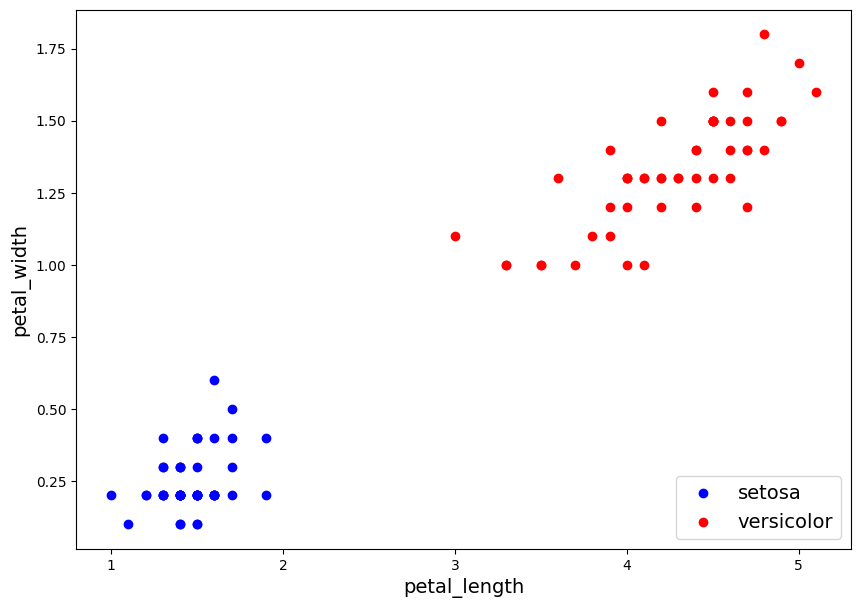

In [ ]:
# Representacion grafica de dos dimensiones del conjunto de datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))

plt.scatter(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0], c="b", label="setosa")

plt.scatter(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1], c="r", label="versicolor")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

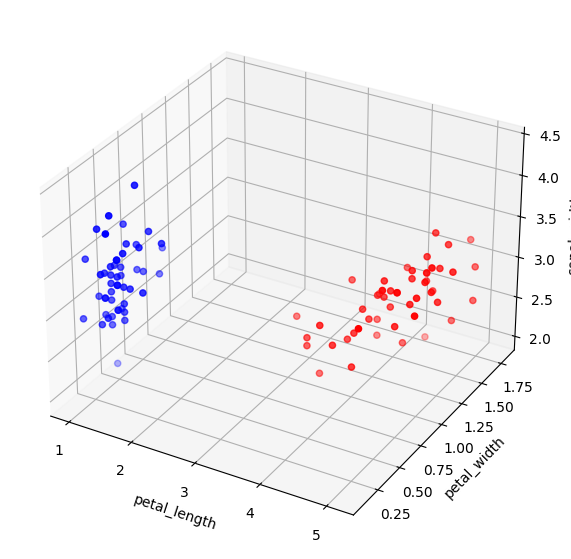

In [ ]:
# Representacion grafica de tres dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0],
            df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1],
            df["sepal width (cm)"][df["target"] == 1], c="r")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")

plt.show()

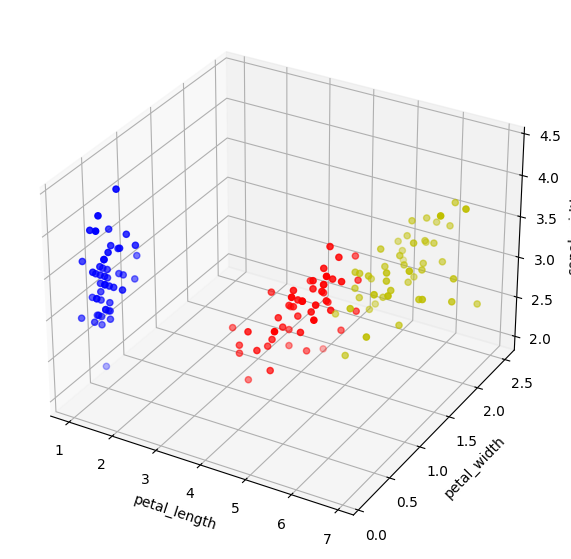

In [ ]:
# Representacion grafica de tres dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0],
            df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1],
            df["sepal width (cm)"][df["target"] == 1], c="r")

ax.scatter3D(df["petal length (cm)"][df["target"] == 2],
            df["petal width (cm)"][df["target"] == 2],
            df["sepal width (cm)"][df["target"] == 2], c="y")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")

plt.show()

# ***Entrenamiento del algoritmo***

In [ ]:
# Reducimos el conjunto de datos para entrenar el algoritmo y visualizar el resultado
df_reduced = df[["petal length (cm)", "petal width (cm)", "target"]]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [ ]:
# Separamos las etiquetas de salida del resto de caracteristicas del conjunto de datos
X_df = df_reduced[["petal length (cm)", "petal width (cm)"]]
y_df = df_reduced["target"]

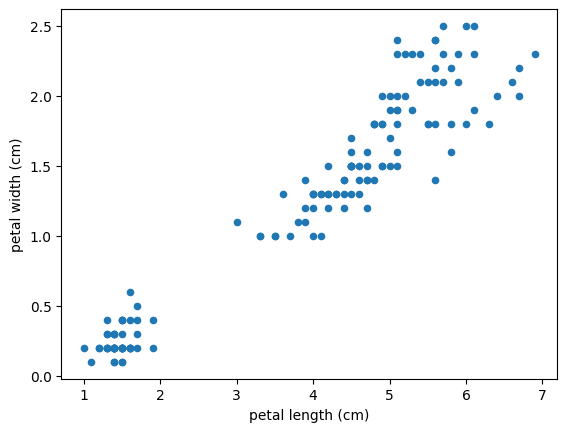

In [ ]:
# Visualizamos el conjunto de datos de entrenamiento reducido
X_df.plot.scatter("petal length (cm)", "petal width (cm)")
plt.show()

# ***3.1 Perceptrón Simple***

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=2000, random_state=20)

clf.fit(X_df, y_df)

Perceptron(max_iter=2000, random_state=20)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


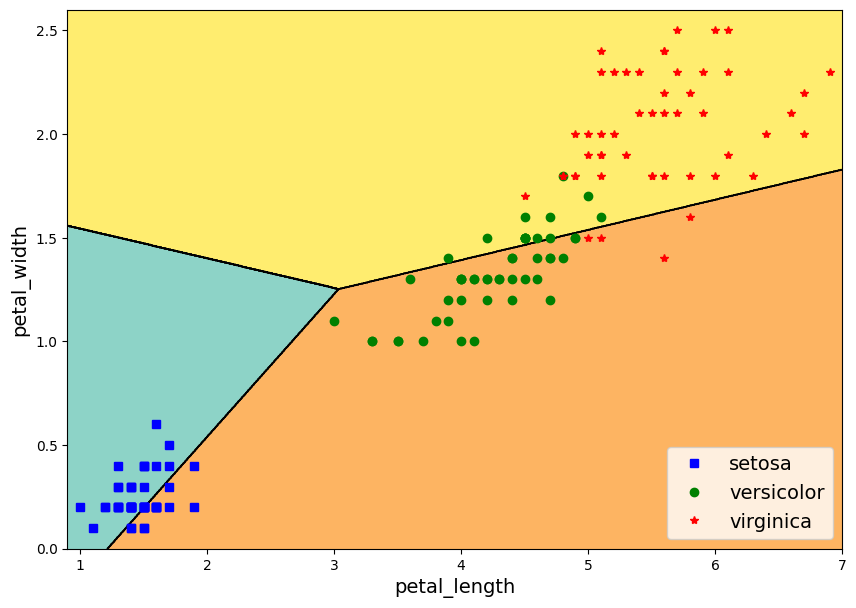

In [ ]:
# Representacion grafica del limite de decision
import numpy as np


X = X_df.values
mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 7))

plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="setosa")
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label="versicolor")
plt.plot(X[:, 0][y_df==2], X[:, 1][y_df==2], 'r*', label="virginica")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

# ***3.2 Perceptrón Multicapa***

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_df, y_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
# Número de capas del perceptrón multicapa
clf.n_layers_

3

In [ ]:
clf.hidden_layer_sizes

(100,)

In [ ]:
# Número de outputs del perceptrón multicapa
clf.n_outputs_

3

In [ ]:
# Número de párametros que forman el modelo
clf.coefs_[1].shape

(100, 3)

In [ ]:
# z1(x) = x1*w1,1 + x2*w2,1 +b1
# ...
# z100(x) = x1*w1,100 + x2*w2,100 + b100

In [ ]:
clf.intercepts_[1]

array([ 0.28665864,  0.08001534, -0.18307532])

In [ ]:
X_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


from matplotlib import pyplot as plt
X_df['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_df['petal width (cm)'].plot(kind='hist', bins=20, title='petal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_df['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_df['petal width (cm)'].plot(kind='line', figsize=(8, 4), title='petal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


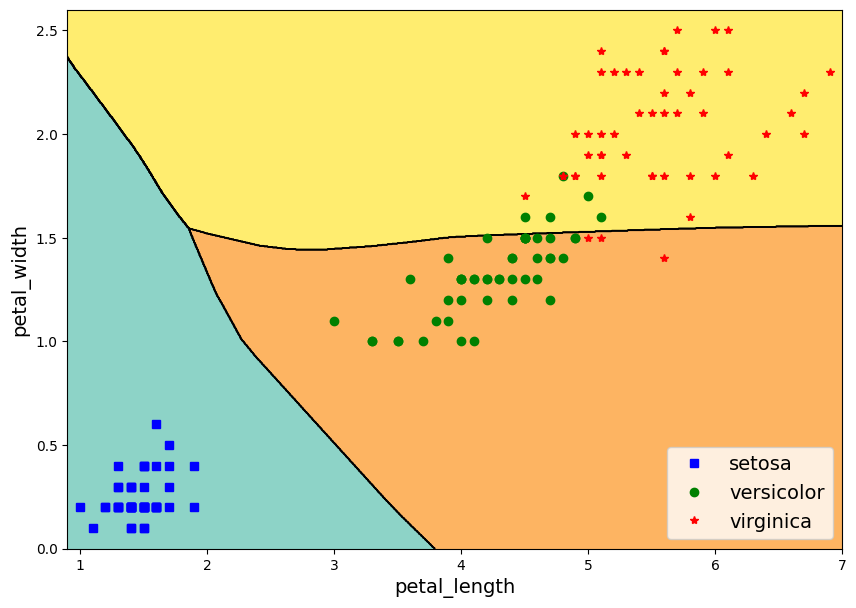

In [ ]:
# Representacion grafica del limite de decision
import numpy as np


X = X_df.values
mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 7))

plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="setosa")
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label="versicolor")
plt.plot(X[:, 0][y_df==2], X[:, 1][y_df==2], 'r*', label="virginica")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()